<h1><b>MINI PROJETO 2 | </b>Lucas Fontenla</h1>
____
<h2>Estudo da distribuição da média amostral via simulação</h2>
____

<p>O objetivo deste miniprojeto é que o aluno seja capaz de compreender e explicar o
resultado do Teorema do Limite Central (TLC) por meio de simulação, uma vez que a
demonstração teórica é complexa e requer conhecimento de outras teorias avançadas.
A seguir, apresentamos a definição da média amostral e o resultado descrito no Teorema do
Limite Central.</p>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import expon
import numpy

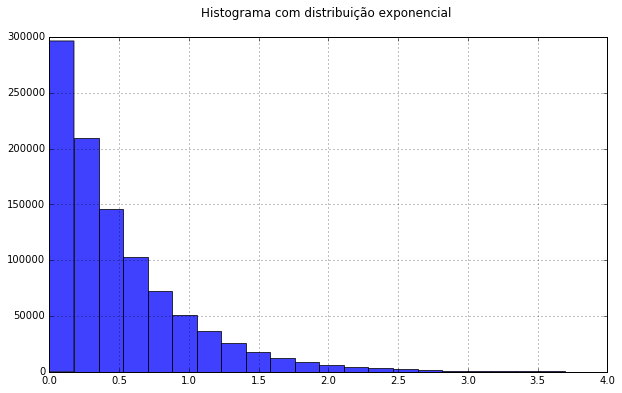

Média: 0.5
Variância: 0.25


In [3]:
mu = 0
Lambda = 0.5

exp = expon.rvs(loc=mu, scale=Lambda, size=1000000, random_state=None)

plt.figure(figsize=(10,6))
plt.hist(exp, bins=40, alpha=0.75)
plt.axis([0,4,0,300000])
plt.grid()
plt.title('Histograma com distribuição exponencial \n')
plt.show()

media = sum(exp)/len(exp)
variancia = (sum(exp*exp)/len(exp)) - media**2
    
print('Média:', round(media,3))
print('Variância:', round(variancia, 3))

In [4]:
chosen = numpy.random.choice(exp, 2)
print('Sorteio de 2 números: ', chosen)
print('Média: ', chosen.mean())

Sorteio de 2 números:  [ 1.60081051  1.96133084]
Média:  1.78107067394


Repetindo 10 mil vezes


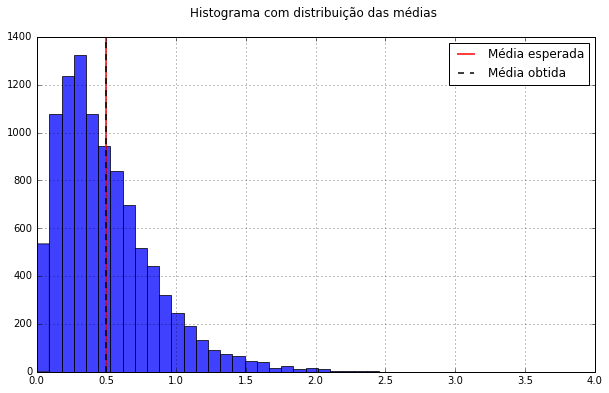

In [5]:
print('Repetindo 10 mil vezes')

medias = list()

for i in range(0, 10000):
    medias.append(numpy.random.choice(exp,2).mean())

plt.figure(figsize=(10,6))
plt.hist(medias, bins=40, alpha=0.75)
plt.axvline(media, color='red', lw=2, alpha=0.75, label='Média esperada')
plt.axvline(sum(medias)/len(medias), color='black', lw=2, alpha=0.75, ls='dashed', label='Média obtida')
plt.grid()
plt.legend(loc='best')
plt.title('Histograma com distribuição das médias \n')
plt.show()

<h4><b>Interpretação dos resultados</b></h4>
<p>Nota-se que a distribuiçao das médias tem como a média, um valor muito próximo do valor cáculado anteriormente, ou seja, com pequenas amostras, ao replicá-las muitas vezes, é possível obter um histograma com as médias de ocorrências, sendo que, a média desse historgrama é um valor muito próximo da média real dos dados.</p>

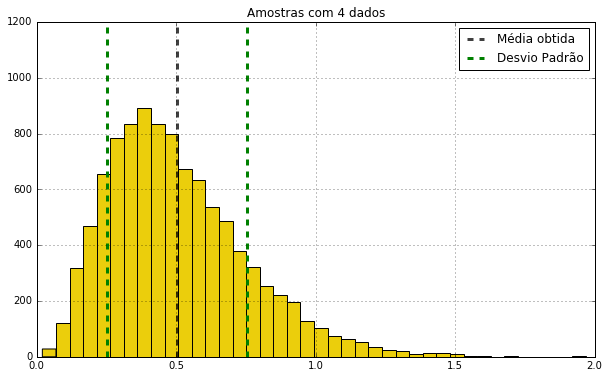

Média esperada:  0.5001719
Média obtida:  0.5034056
Diferença:  0.0032338

Variância esperada:  0.2504106
Variância pela definição do TLC (var/n):  0.0626026
Variância obtida:  0.0624954
Diferença (var definição - var obtida)  0.0001072


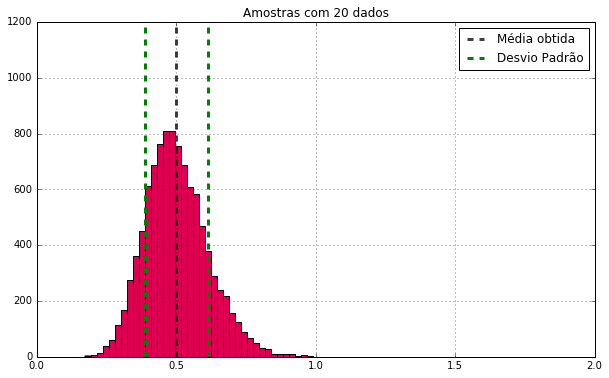

Média esperada:  0.5001719
Média obtida:  0.5010539
Diferença:  0.0008821

Variância esperada:  0.2504106
Variância pela definição do TLC (var/n):  0.0125205
Variância obtida:  0.0127682
Diferença (var definição - var obtida)  0.0002477


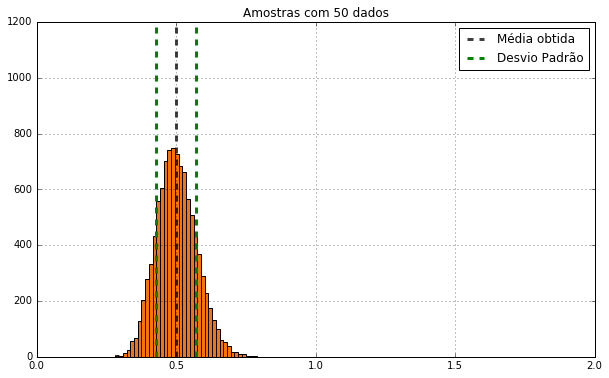

Média esperada:  0.5001719
Média obtida:  0.5008626
Diferença:  0.0006908

Variância esperada:  0.2504106
Variância pela definição do TLC (var/n):  0.0050082
Variância obtida:  0.0051258
Diferença (var definição - var obtida)  0.0001176


In [20]:
import math

numeros = [4,20,50] 
colours = ['#EBCE0C', '#DE0050', '#F5740C']

for n in numeros:
    medias = list()
    
    for i in range(0, 10000):
        medias.append(numpy.random.choice(exp,n).mean())
        
    x_show = sum(medias)/len(medias)
    var = numpy.var(medias)
    
    plt.figure(figsize=(10,6))
    plt.axis([0, 2, 0, 1200])
    plt.hist(medias, bins=40, color=colours[numeros.index(n)], alpha=1)
    plt.title('Amostras com {0} dados'.format(n))
    plt.axvline(x_show, color='black', lw=3, alpha=0.75, ls='dashed', label='Média obtida')
    plt.axvline(x_show-math.sqrt(var), color='green', ls='dashed', lw=3, label='Desvio Padrão')
    plt.axvline(x_show+math.sqrt(var), color='green', ls='dashed', lw=3)
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    print('Média esperada: ', round(media, 7))
    print('Média obtida: ', round(x_show, 7))
    print('Diferença: ', round(abs(x_show-media), 7))
    print('\nVariância esperada: ', round(variancia, 7))
    print('Variância pela definição do TLC (var/n): ', round((variancia/n),7))
    print('Variância obtida: ', round(var,7))
    print('Diferença (var definição - var obtida) ', round(abs(variancia/n-var), 7))

<h3>O Teorema do Limite Central - TLC</h3>
<p>Imaginando um conjunto de dados, é possível calcular sua média e variância, usando equações de estatística. O teorema do limite central nos diz que se fizemos diversas amostras de n dados do nosso conjunto inicial, as médias das amostras formarão uma distribuição normal. A média da distribuição normal formada é a mesma média do conjunto de dados de onde tiramos as amostras e a variância é dada, também, pela variância do conjunto de dados porém dividido por n.</p>
<p>Quando cada vez mais aumenta-se o número de dados por amostra, aumenta-se, consequentemente, a proximidade do valor da média e variância da normal da média e da variância do conjunto de dados.</p>
<p>Pensemos na seguinte situação, se temos 10 pessoas com alturas diferentes, e fizermos diversas amostras desse conjunto, se cada vez aumentarmos o número de dados por amostra, ficaremos cada vez mais fiel à média e a variancia. Exemplo, se na própria amostra nos pegarmos as 10 pessoas do nosso conjunto original, teremos exatamente a média e desvio padrão do conjunto inicial.</p>
<p>Como prova, vejamos logo acima, que abaixo dos gráficos, temos a média e variância que esperamos menos a média e a variância teórica da normal, e vemos que é muito próximo, com diferença menor que 0.005.</p>


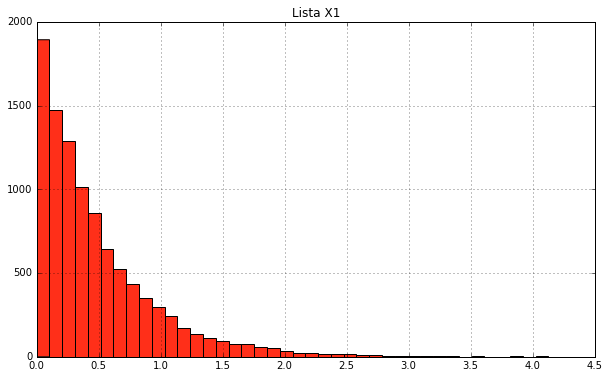

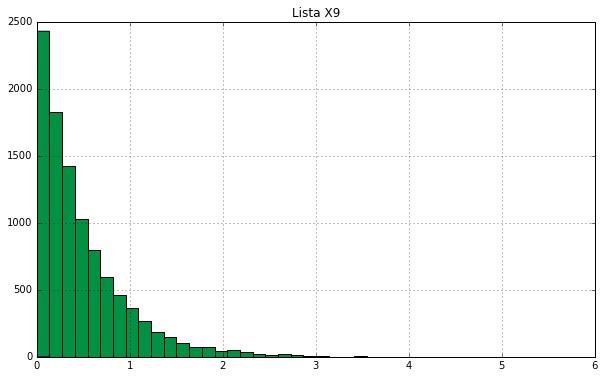

Coeficiente de Correlação:  0.0081


In [36]:
X1 = list()
X9 = list()
n = 50

for i in range(0, 10000):
        medias = numpy.random.choice(exp,n)
        X1.append(medias[0])
        X9.append(medias[8])

plt.figure(figsize=(10,6))
plt.title('Lista X1')
plt.hist(X1, bins=40, color='#FF2F19')
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.title('Lista X9')
plt.hist(X9, bins=40, color="#009143")
plt.grid()
plt.show()

corrcoef = numpy.corrcoef(X1, X9)

print('Coeficiente de Correlação: ', round(corrcoef[1][0], 4))